In [2]:
import matplotlib.pylab as plt # I use version 3.1.2
#Notes for installing skimage: https://scikit-image.org/docs/dev/install.html
from skimage.morphology import skeletonize # I use version 0.16.2
import numpy as np # I use version 1.18.1
import time
import cv2

def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


(1024, 1280, 3)

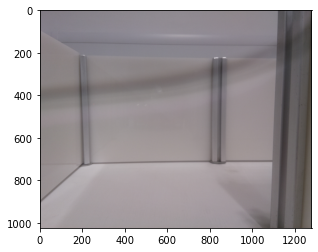

In [59]:
# read the image file
img = cv2.imread('1.jpg')
  
#ret, rgb_img = cv2.threshold(img, 135, 300, cv2.THRESH_BINARY)
img = cv2.rotate(img, cv2.ROTATE_180)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(fixColor(img))
#plt.imshow(fixColor(gray))
  
# converting to its binary form
#bw = cv2.threshold(img, 185, 750, cv2.THRESH_BINARY)
  
# cv2.imshow("Binary", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img.shape

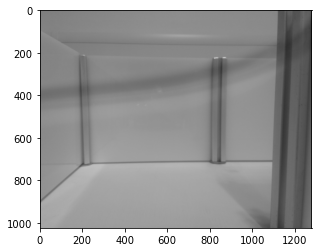

In [61]:
plt.imshow(fixColor(blurred))

(array([2708], dtype=int64),)
456.228013168854


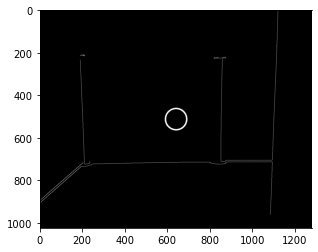

In [101]:

import math
def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

canny = cv2.Canny(blurred, 40, 140)
row_indexes, col_indexes = np.nonzero(canny)
#print(row_indexes,col_indexes )
print(np.where(col_indexes == 400))
[row_indexes[np.where(col_indexes == 400)]]


(x, y) = canny.shape
w= x/2
l = y/2
cv2.circle(canny, (int(l),int(w)), radius=50, color=(255, 255, 255), thickness=5)
print(calculateDistance(w,l,900,400))
#new = zoom(img)
plt.imshow(fixColor(canny))
#print(canny[600])
# (x, y) = canny.shape
# w= x/2
# l = y/2
# print(w, l)
# crop = canny[int(w):int(x+l), int(l):int(l+w)]
# plt.imshow(fixColor(crop))




In [29]:
# canny_new = [[i if i == 0 else 255 for i in j] for j in canny]
# print(len(canny_new), len(canny_new[0]))
# count2 = 0
# for i in canny:
#     count = 0
#     #count2 = 0
#     print(i)
    
#     for j in i:
#         #print(j)
#         print(canny[count2][count])
#         if j == 0:
#             canny[count2][count] = 200
#             count = count + 1
#             if count > 5:  
#                 break;
#                 #print('This must be the wall')
#     count2 = count2+1
    
#plt.imshow(fixColor(canny_new))
# recolor(img, 'white', 0, 255)

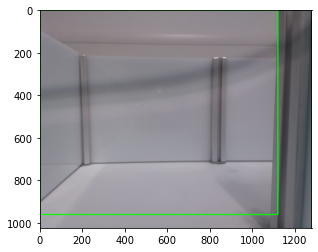

In [35]:
pts = np.argwhere(canny>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)
cropped = img[y1:y2, x1:x2]
cv2.imwrite("cropped.png", cropped)
tagged = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), (0,255,0), 3, cv2.LINE_AA)
plt.imshow(tagged)

In [16]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [83]:
coins = img.copy()
lol = cnts[17]
[lol]

IndexError: tuple index out of range

0


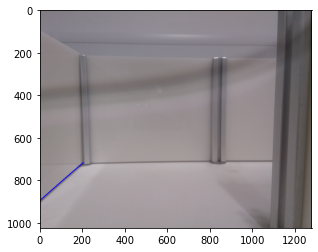

1


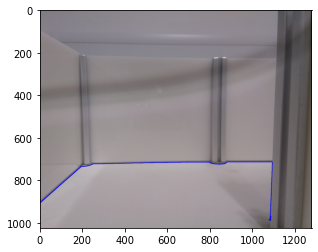

2


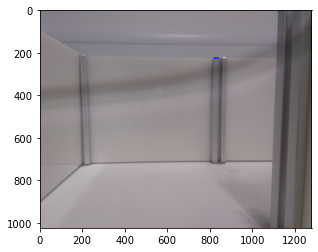

3


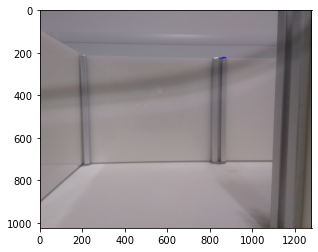

4


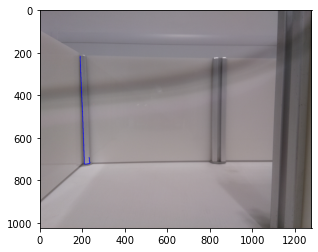

5


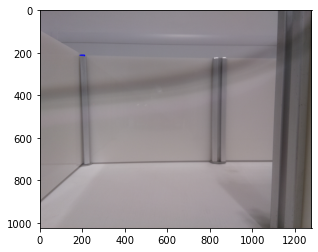

6


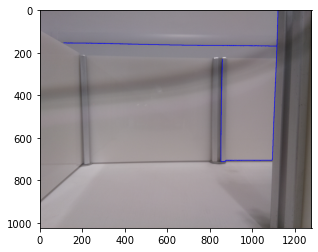

IndexError: tuple index out of range

In [87]:
for i in range(0,15):
    coins = img.copy()
    cv2.drawContours(coins, [cnts[i]], 0,(255, 0, 0), 2)
    plt.imshow(fixColor(coins))
    print(i)
    plt.pause(1)
    

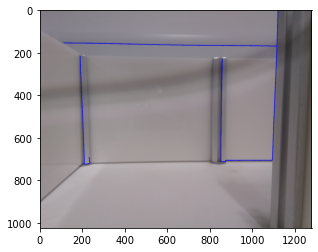

In [89]:
coins = img.copy()
# cv2.drawContours(coins, [cnts[13]], 0,(255,0, 0), 2)
cv2.drawContours(coins, [cnts[4]], 0,(255, 0, 0), 2)
cv2.drawContours(coins, [cnts[6]], 0,(255, 0, 0), 2)
plt.imshow(fixColor(coins))

In [68]:
x = np.where(coins == (255, 255, 0))

In [69]:
print(len(x), len(x[0]))

3 3384


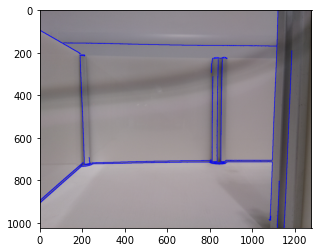

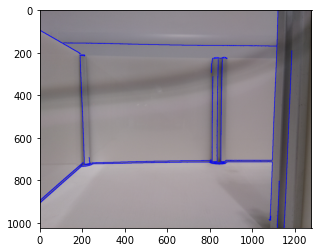

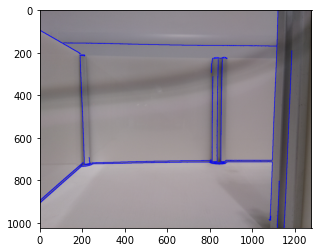

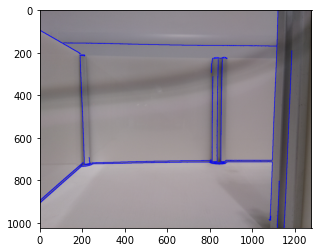

6


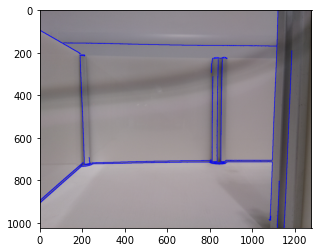

7


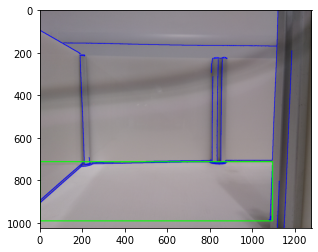

8


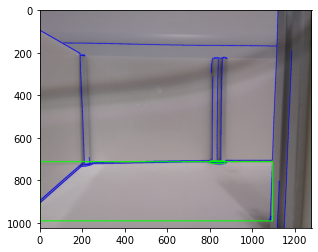

9


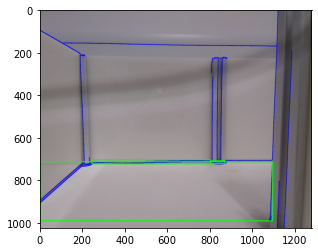

10


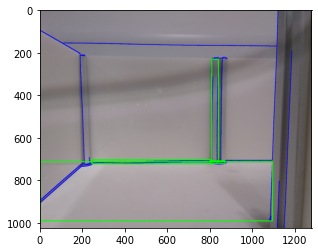

11


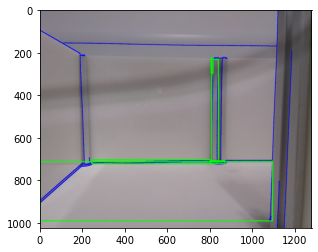

12


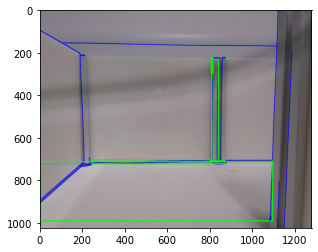

13


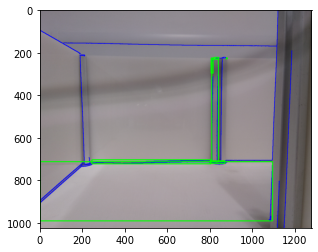

14


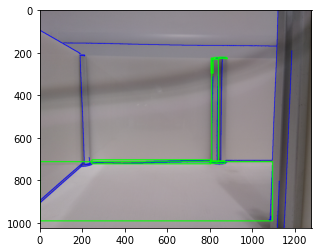

15


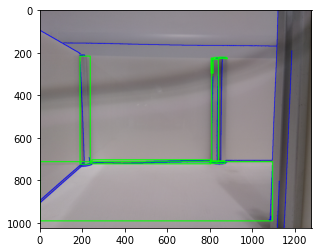

16


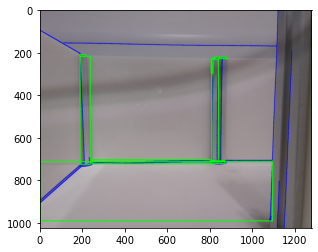

17


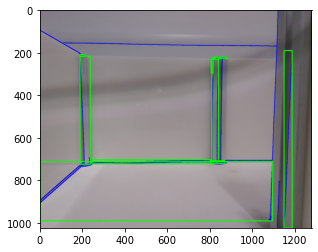

18


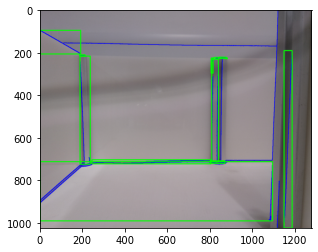

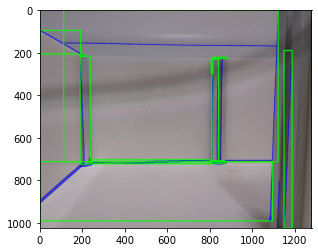

In [56]:
count = 0
for cnt in cnts:
    #print(cnt)
    count = count +1;
    if count > 5:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(coins,(x,y),(x+w,y+h),(0,255,0),3)
        print(count)
    #time.sleep(5)
    plt.pause(1)
    plt.imshow(fixColor(coins))
    #print(cnt)
#plt.imshow(fixColor(coins))